Импортируем необходимые библиотеки

In [23]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

В качестве непрерывного распределения я выбрал треугольное (triangular distribution), его плотность распределения представляет собой треугольник. Описание распределения: \
Википедия - https://en.wikipedia.org/wiki/Triangular_distribution \
Мануал Scipy - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang \
Scipy позволяет задать левую границу отрезка (loc), размах (scale) и моду (с) распределения.

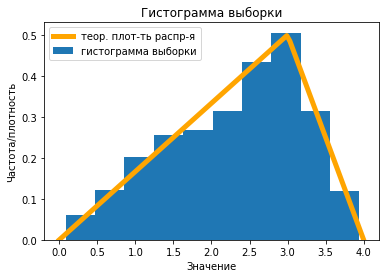

In [20]:
plt.figure(1)

dist = sts.triang(c = 0.75, loc=0, scale = 4) # задаем наше распределение
[m,v] = dist.stats() # используем метод .stats() для нахождения среднего и дисперсии
#m и v будут в дальнейшем использованы при расчете параметров аппроксимирующего распределения

## построение теоретической плотности распределения
x = np.linspace(0,4,100)
y = dist.pdf(x)
plt.plot(x,y,label='теор. плот-ть распр-я',color = 'orange', linewidth=5) 

## извлечение выборки из нашего распределения и построение ее гистограммы на тех же осях
sample = dist.rvs(1000)
plt.hist(sample,density = True,label='гистограмма выборки')

## подпишем график и оси, добавим легенду
plt.title('Гистограмма выборки')
plt.xlabel('Значение')
plt.ylabel('Частота/плотность')
plt.legend()

Перейдем к извлечению большого числа выборок разного объема, построению распределений выборочных средних и их последующей аппроксимацию нормальным распределением в соответствии с ЦПТ.

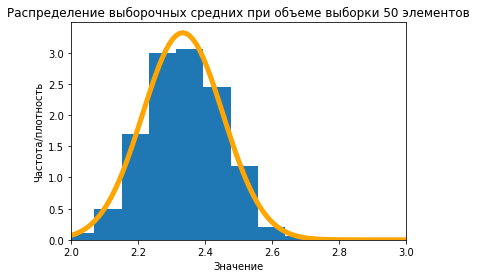

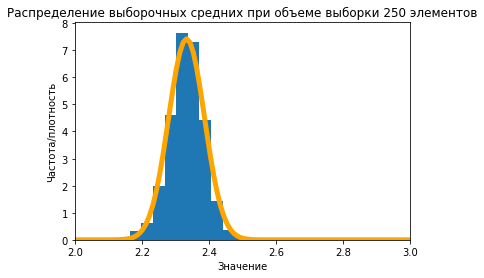

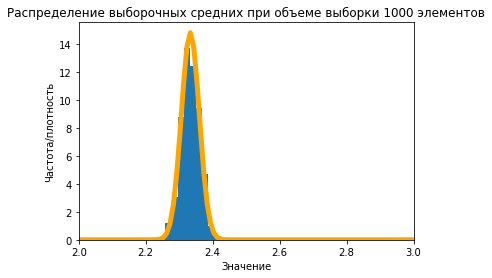

In [22]:
n = [50, 250, 1000] #рассмотрим выборки из 50, 250, 1000 элементов

## расчет выборочных средних
for a in n:
    plt.figure(a)
    mean_list = []
    for i in range(1,1000): #всего будем извлекать 999 выборок заданного объема
        sample_n = dist.rvs(a) # извлечение выборки
        mean_list.append(np.mean(sample_n)) #расчет выборочных средних
        
    ## построение гистограммы распределения выборочных средних, подпись графика и осей    
    plt.hist(mean_list, density = True)
    plt.xlim(2,3)
    plt.title('Распределение выборочных средних при объеме выборки '+ str(a) +' элементов')
    plt.xlabel('Значение')
    plt.ylabel('Частота/плотность')
    
    ## аппроксимация гистограммы выборочных средних нормальным распределением 
    ## в соответствии с утверждением ЦПТ
    x = np.linspace(2,3,100)
    fitting_dist = sts.norm(m,np.sqrt(v/a)) # среднее аппркосимирующего распределения совпадает 
    # со средним распределения, из которого извлекались выборки; 
    # дисперсия же зависит от объема выборки обратно пропорционально
    y = fitting_dist.pdf(x)
    plt.plot(x,y, color = 'orange', linewidth=5)

$\underline{Выводы:}$

1. Видно, что распределение выборочных средних действительно стремится к нормальному. И чем больше объем выборки, тем оно более похоже на нормальное.
2. C увеличением объема выборки разброс (то есть дисперсия) аппроксимирующего нормального распределения становится меньше. Точность аппроксимации повышается. 
3. Полученные результат доказывает, что ЦПТ работает также и для ненормальных и скошенных распределений. 